In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
#read data in the file
data = pd.read_csv("housing.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
#when we look at the data we also see that all values are numerical except the data field
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

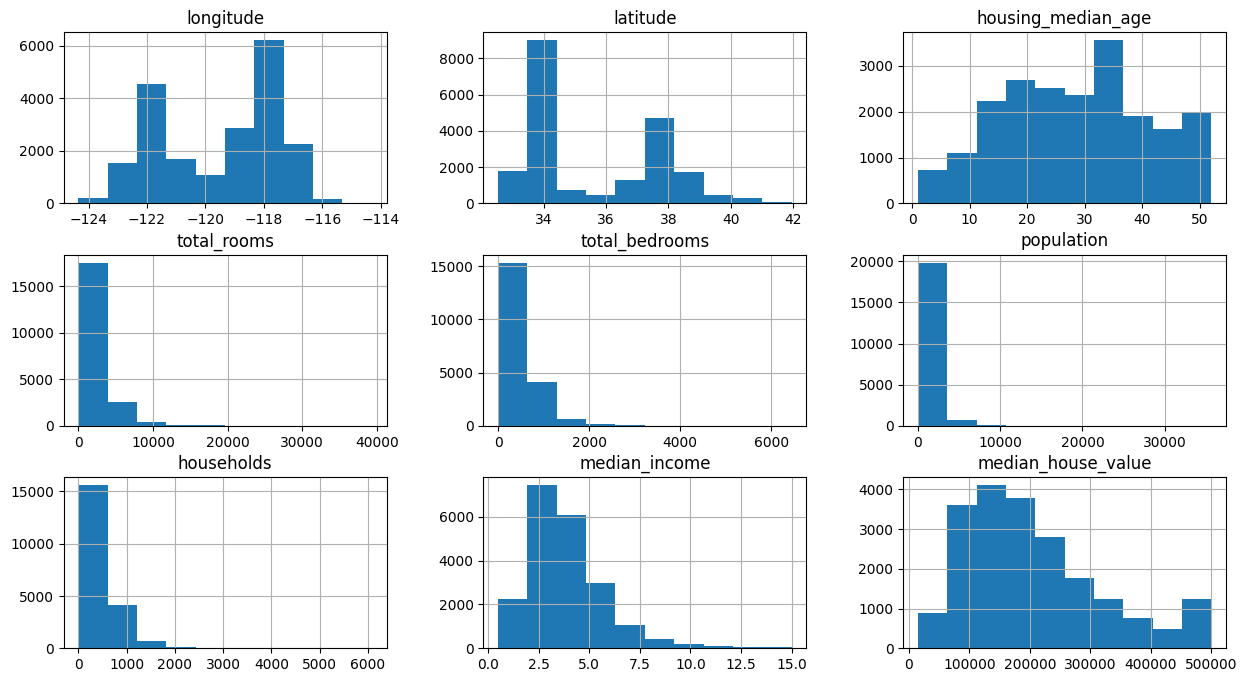

In [4]:
# we can then create a  histogram to show distribution of various features in the data and 
#  their correlation with the target variable
import matplotlib.pyplot as plt
data.hist(figsize= (15, 8))

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

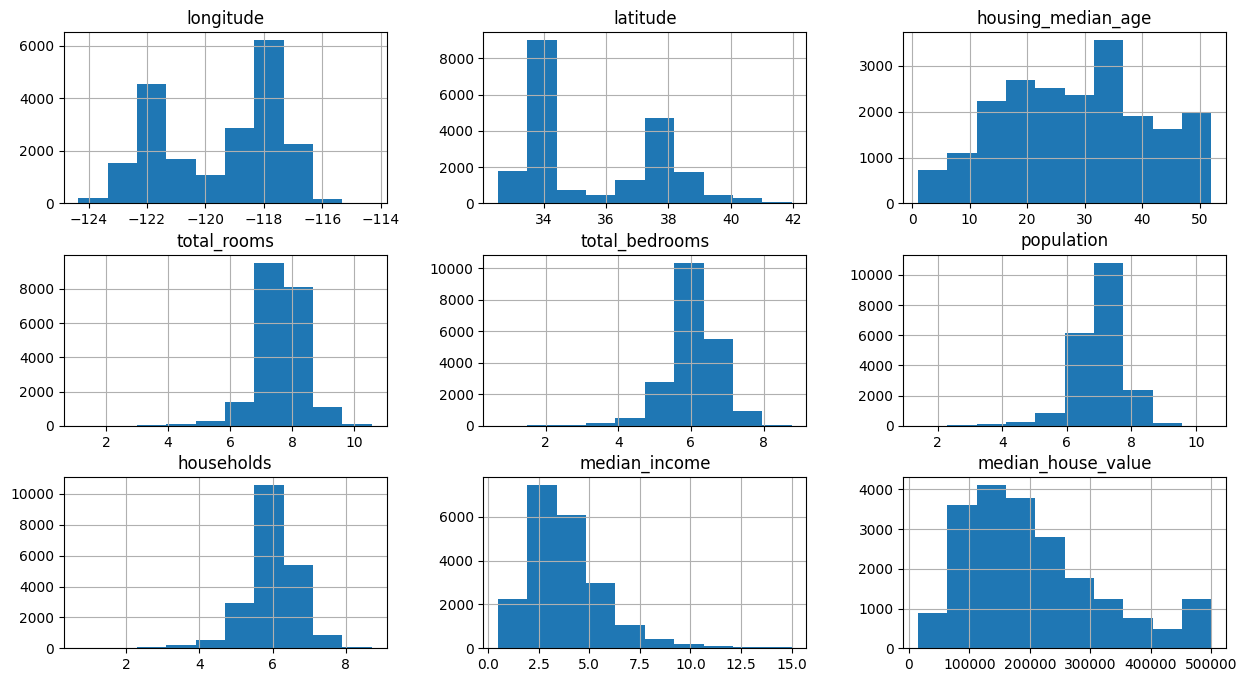

In [5]:

#some of the data in the histogram above is skewed and in order to see efffectively how the
#distribution looks like we are going to use the logarithms of the data
data['total_rooms'] = np.log(data['total_rooms']+ 1)
data['total_bedrooms'] = np.log(data['total_bedrooms']+ 1)
data['population'] = np.log(data['population']+  1)
data['households'] = np.log(data['households']+ 1)
#when we test the data we can now see that the data is now less skewed 
data.hist(figsize= (15, 8))

In [6]:
from sklearn.model_selection import train_test_split

#data frame without the target variable in this case the median_house variable
a = data.drop(['median_house_value'], axis = 1)
#target variable
b = data['median_house_value']

#train_test_split will reserve 20 percent of our data which will be used for testing.
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size= 0.2) 

#join the a training data into b data in order to analyze any correlations
train_data = a_train.join(b_train)

<AxesSubplot: >

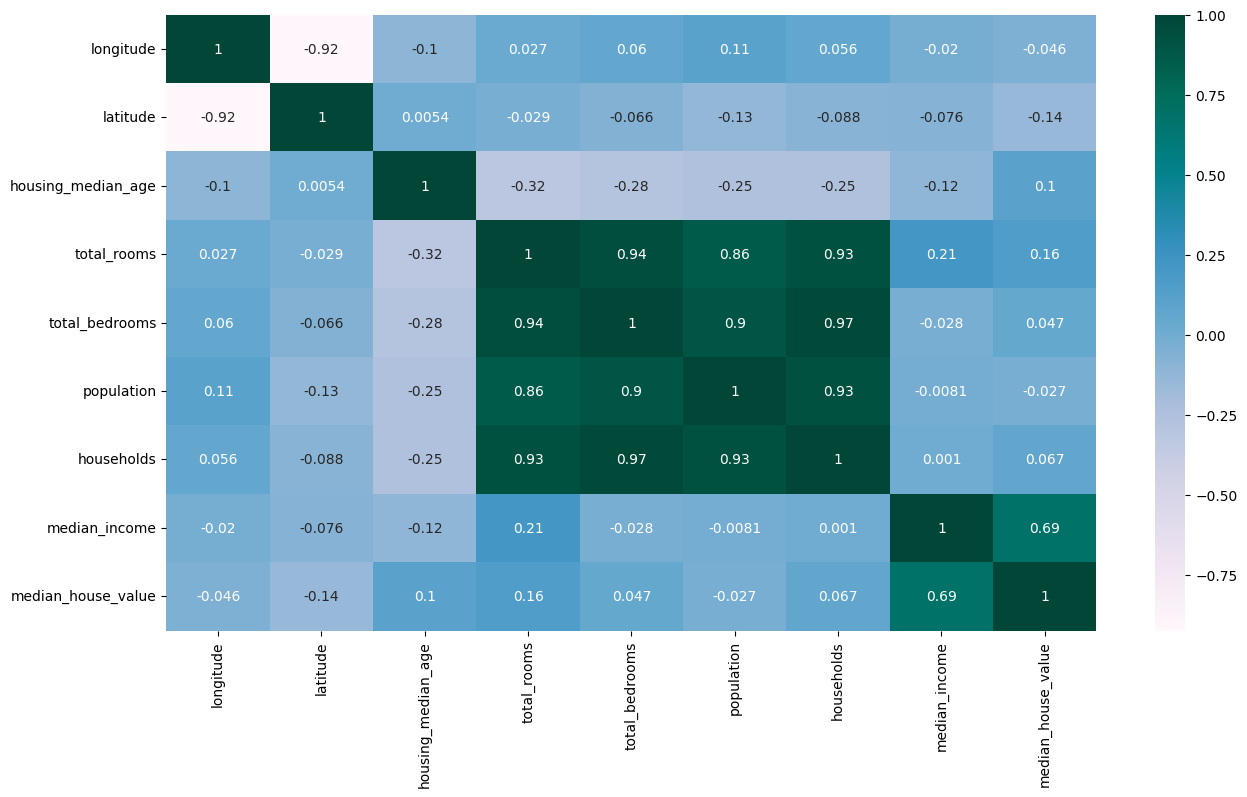

In [7]:
#plot a correlation heap map of the data with the target variable
plot.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only = True),annot=True, cmap="PuBuGn")

In [8]:
train_data["rooms_per_household"] = train_data["total_rooms"]/train_data["households"]
train_data["bedrooms_per_household"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["population_per_household"]=train_data["population"]/train_data["households"]
#show the different correlations of the features when compared to the target variable median_house_value
train_data.corr(numeric_only = True)['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.689132
total_rooms                 0.155184
rooms_per_household         0.118018
housing_median_age          0.103350
households                  0.066828
total_bedrooms              0.046778
population                 -0.027170
longitude                  -0.046059
latitude                   -0.144761
population_per_household   -0.182351
bedrooms_per_household     -0.205612
Name: median_house_value, dtype: float64

<AxesSubplot: >

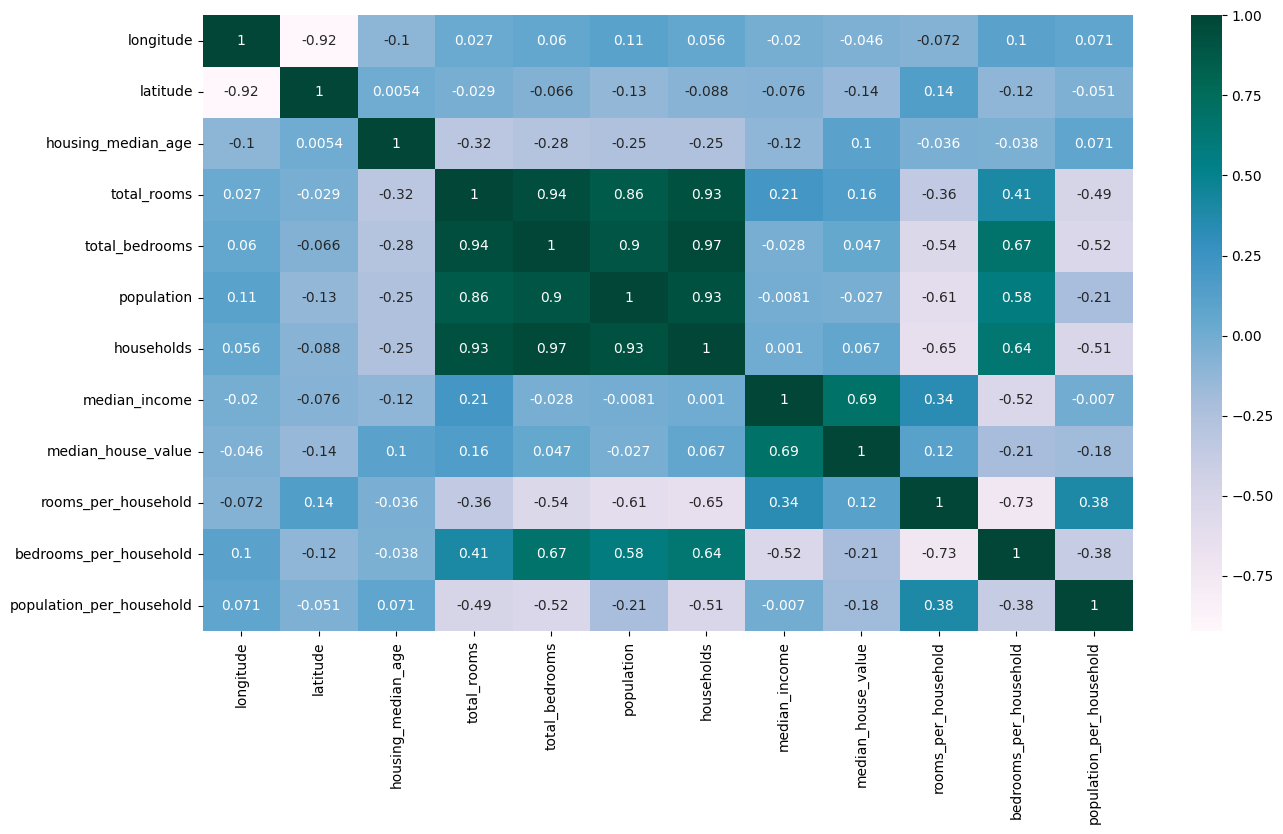

In [9]:
#plot another correlation heap map of the data with the target variable
plot.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only = True),annot=True, cmap="PuBuGn")

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

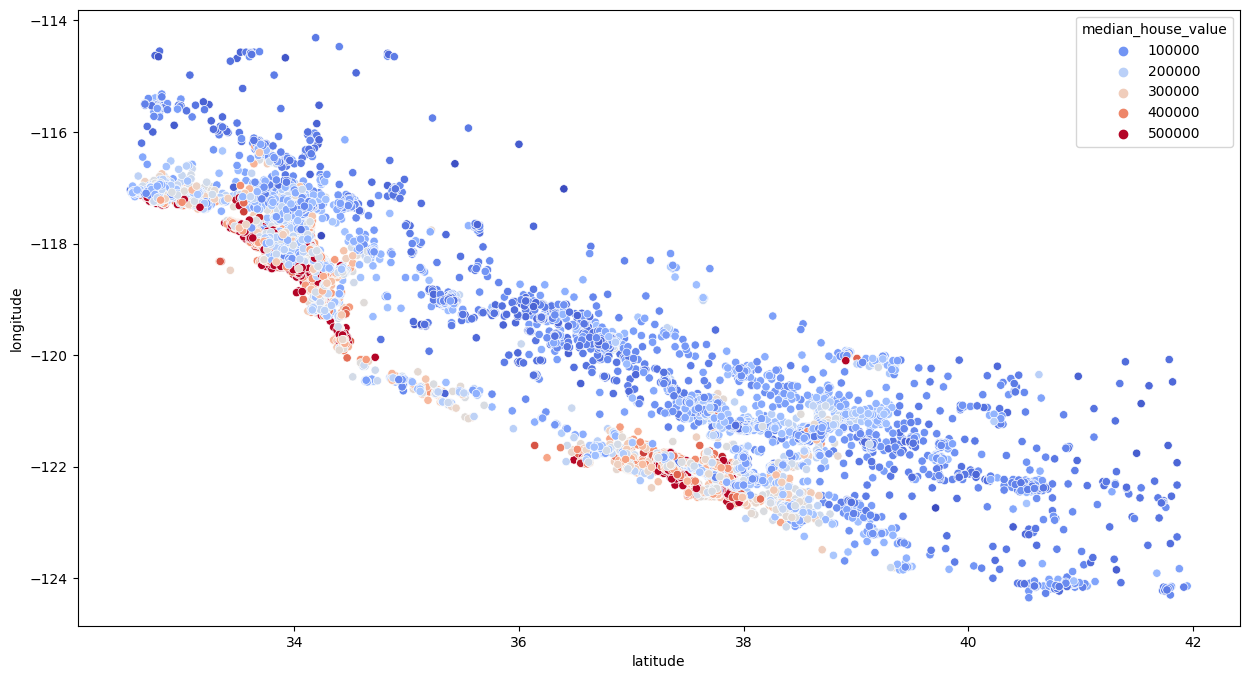

In [10]:
#another way we could analyze this data is buy using a heap map
#plot a correlation heap map of the data with the target variable
plot.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y = "longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [11]:
# we then start clean training set and seperate the predictors and target values.
data = train_data.drop('median_house_value',axis = 1)
b_test = train_data['median_house_value'].copy()

In [12]:
#First, we take care of the missing values in total bedrooms 
# by replacing each missing value by the median value of the attribute.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data_num = data.drop('ocean_proximity',axis=1)
train_data = pd.DataFrame(imputer.fit_transform(data_num), columns=data_num.columns, index=data_num.index)
#as seen below there are no missing values in total bedrooms unline before
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6205 to 4598
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_household    16512 non-null  float64
 10  population_per_household  16512 non-null  float64
dtypes: float64(11)
memory usage: 2.0 MB


In [13]:
# We will then make a custom transform. This transform will add the columns bedrooms_per_room , rooms_per_household and population_per_household. 
# A variable bedroom_ratio will govern the addition of the bedrooms_per_room column. 

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_category = data[['ocean_proximity']]
data_encoded = ordinal_encoder.fit_transform(data_category)
data_encoded

ValueError: could not convert string to float: 'NEAR OCEAN'

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
room, bedroom, population, household = 3, 4, 5, 6
class AddMoreFeatures(BaseEstimator,TransformerMixin):
  def __init__(self, bedroom_ratio=True):
    self.bedroom_ratio = bedroom_ratio
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    rooms_per_household = X[:,room]/X[:,household]
    population_per_household = X[:,population]/X[:,household]
    if self.bedroom_ratio:
      bedrooms_per_household = X[:,bedroom]/X[:,room]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_household]
    else:
      np.c_[X,rooms_per_household,population_per_household]

In [ ]:
adder = AddMoreFeatures(bedroom_ratio=False)
extra_attributes = adder.transform(data.values)

In [ ]:
# we will then create a transformation pipeline for all the data we have transformed
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('adder', AddMoreFeatures()),('std_scaler', StandardScaler()),])
data_num_tr = num_pipeline.fit_transform(data_num)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
numerical_attributes = list(data_num)
non_numerical_attributes = ['ocean_proximity']
full_pipeline = ColumnTransformer([('num',num_pipeline,numerical_attributes),('category',OneHotEncoder(),non_numerical_attributes),])
a_test = full_pipeline.fit_transform(data)

In [ ]:
#create a  simplelinear regression model
from sklearn.linear_model import LinearRegression
reggression = LinearRegression()
reggression.fit(a_test,b_test)

LinearRegression()

In [ ]:
#We will test our data by tring to predict the first 20 entries 
first_test_data = data.iloc[:20]
some_test_data = b_test.iloc[:20]
test_prep = full_pipeline.transform(first_test_data)

In [ ]:
print("Predictions of housing prices: ",reggression.predict(test_prep))

Predictions of housing prices:  [189324.92774834 475621.87265645 172205.34620954 183508.65444976
 166665.9686303  418818.91692328 141929.69420097 306229.29492085
 331139.9735737  216960.63411468 195845.47812087  94814.78533408
 290632.0864466  177310.00510646 196024.49949461 133974.09352518
 263898.82423558  93422.51556931 237235.5626935  129202.83425933]


In [ ]:
print("Actual prices of the houses in California: ",list(some_test_data))

Actual prices of the houses in California:  [87500.0, 382400.0, 133500.0, 158700.0, 173600.0, 500001.0, 103400.0, 280300.0, 283300.0, 383800.0, 229500.0, 57000.0, 247600.0, 142500.0, 165500.0, 139200.0, 250000.0, 87500.0, 169800.0, 145800.0]


In [ ]:
#get simple regression score
reggression.score(a_test, b_test)

0.6739901726425568

In [ ]:
#find the optimal model using the random forest regression  model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(a_test, b_test)

RandomForestRegressor()

In [ ]:
print("Predictions of prices: ",reggression.predict(test_prep))

Predictions of prices:  [189324.92774834 475621.87265645 172205.34620954 183508.65444976
 166665.9686303  418818.91692328 141929.69420097 306229.29492085
 331139.9735737  216960.63411468 195845.47812087  94814.78533408
 290632.0864466  177310.00510646 196024.49949461 133974.09352518
 263898.82423558  93422.51556931 237235.5626935  129202.83425933]


In [ ]:
print("Actual prices: ",list(some_test_data))

Actual prices:  [87500.0, 382400.0, 133500.0, 158700.0, 173600.0, 500001.0, 103400.0, 280300.0, 283300.0, 383800.0, 229500.0, 57000.0, 247600.0, 142500.0, 165500.0, 139200.0, 250000.0, 87500.0, 169800.0, 145800.0]


In [ ]:
forest.score(a_test, b_test)

0.97329220629311